# GRIP : The Sparks Foundation

Data Science and Business Analytics Internship

## Task 1 : Prediction using supervised machine learning

### Author : Susmita Mane

In this task 'Simple Linear Regression' will be performed on 'Scores of students and their study hours', the dataset contain two variables study hours and their scores.

# Step 1

## Importing Libraries

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2

## Importing Dataset

In [47]:
data=pd.read_csv("C:/Users/susmi/Desktop/susmita/internship/student_scores - student_scores.csv")
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Step 3

## Checking and visualising data

In [48]:
# Top five rows
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [49]:
# Last five rows
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [50]:
# Rows and columns in dataset
data.shape

(25, 2)

In [51]:
# Descriptive statistics
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Mean average of study hour is 5 hours, minimum stydy hour is 1 hour and maximum study hour are 9 hours. 

## Checking for Null values

In [52]:
# To check missing values in data
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

There is no null value in the Dataset so, we can now visualize our Data.

In [53]:
# Information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## Visualising Data

### To check the relationship between two variables linear regression very effective used to predict the scores based on the number of hours.

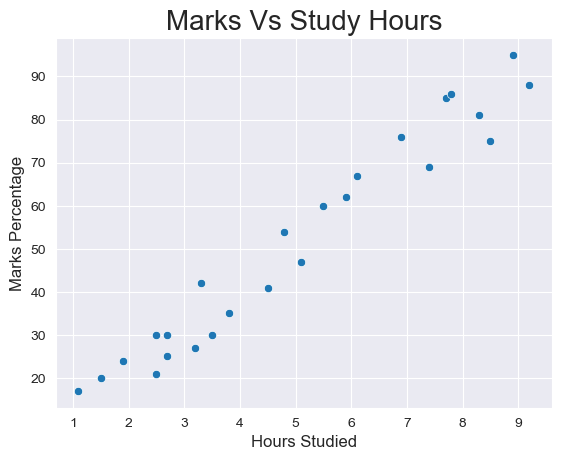

In [54]:
sns.set_style('darkgrid')
sns.scatterplot(y= data['Scores'], x= data['Hours'])
plt.title('Marks Vs Study Hours',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

From the above scatter plot there looks to be correlation between the 'Marks Percentage' and 'Hours Studied', Lets plot a regression line to confirm the correlation.

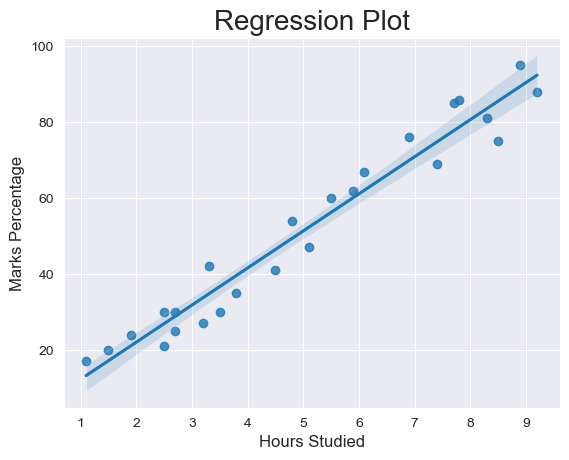

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [55]:
# To find correlation
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(data.corr())

It is confirmed that the variables are positively correlated.

# STEP 4

## Splitting the Data

In [56]:
# Dividing the data in training and testing data
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [57]:
# Dividing the dataset
X = data.iloc[:,:1].values
y = data.iloc[:,1:].values

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# STEP 5

## Let's load the modules for linear regression:

In [59]:
from sklearn.linear_model import LinearRegression

Create the linear regression object:

In [60]:
lr = LinearRegression()
lr

LinearRegression()

## Train the Model

In [61]:
lr.fit(X_train,y_train)

LinearRegression()

In [62]:
line = lr.coef_ * X + lr.intercept_

## Visualising Train Data

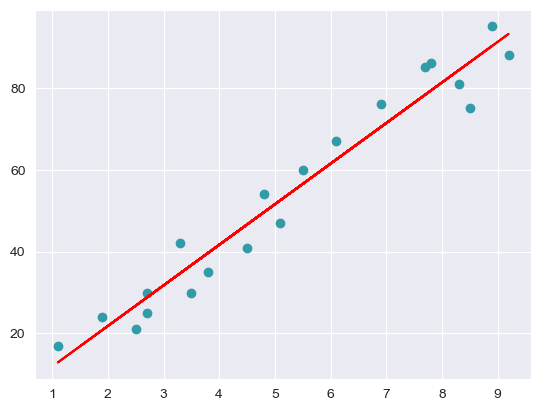

In [63]:
plt.scatter(X_train , y_train , color = "#329ba8")
plt.plot(X , line , color = "r")
plt.show()

From above graph the line give us good prediction about traning dataset.

# Step 6

## Making Predictions

In [64]:
Y_pred = lr.predict(X_test)
Y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

## Visualising Test Data

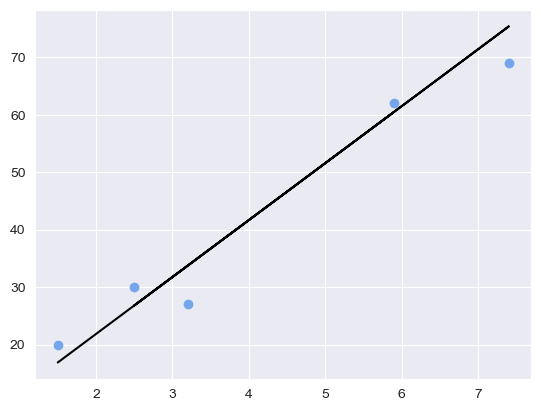

In [65]:
plt.scatter(X_test,y_test , color = "#75a6eb")
plt.plot(X_test,Y_pred , color = "black")
plt.show()

From above graph the line give us quit good prediction about testing dataset.

# Step 7

## Making a Data Frame

In [66]:
df_predict = pd.DataFrame({"Hours": X_test.reshape(1,-1)[0] , "Actual Score" : y_test.reshape(1,-1)[0] , "Predicted Score" : Y_pred.reshape(1,-1)[0]})
df_predict

,Hours,Actual Score,Predicted Score
0,1.5,20,16.884145
1,3.2,27,33.732261
2,7.4,69,75.357018
3,2.5,30,26.794801
4,5.9,62,60.491033


# Step 8

## Visualising the accuracy of the model

In [67]:
df_sorted = df_predict.sort_values(by = "Hours")
df_sorted

,Hours,Actual Score,Predicted Score
0,1.5,20,16.884145
3,2.5,30,26.794801
1,3.2,27,33.732261
4,5.9,62,60.491033
2,7.4,69,75.357018


D:\anaconda setup\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\anaconda setup\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


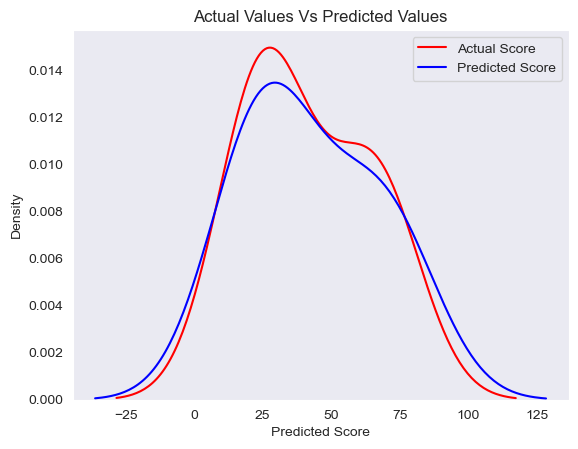

In [68]:
title = "Actual Values Vs Predicted Values"
ax1 = sns.distplot(df_sorted["Actual Score"], hist = False , color = "red" , label = "Actual Score")
sns.distplot(df_sorted["Predicted Score"] , hist = False , color = "blue" , label = "Predicted Score" , ax = ax1)
plt.legend()
plt.grid()
plt.title(title)
plt.show()

In [69]:
from sklearn.metrics import r2_score
from sklearn import metrics

mean_absolute_error=metrics.mean_absolute_error(y_test,Y_pred)
print('Mean absolute error:',mean_absolute_error)

corr=r2_score(y_train,lr.predict(X_train))
print('correlation:',corr)

acc=r2_score(y_test,Y_pred)
print('Accuracy:',acc)

Mean absolute error: 4.183859899002975
correlation: 0.9515510725211552
Accuracy: 0.9454906892105356


# Step 9

## Making Predictions

### To Predict - What will be predicted score if a student studies for 9.25 hrs/ day?

In [70]:
hrs = 9.25
pred = lr.predict([[9.25]])
print("The predicted score if a student studies for 9.25 hrs/ day is",pred[0])

The predicted score if a student studies for 9.25 hrs/ day is [93.69173249]


### Therefore, if a student studied for 9.25 hours then the predicted score of student is 93.6917